# Data Visualisation

Data visualisation is an important tool that a data scientist can use in order to convey ideas and find patterns within the data. It is often much easier to relate ideas with visual imagery, as it is far more intuitive to understand. Furthermore, data visualisation serves as an important 'starting point' for projects, and often this is one of the first steps for a data scientist when they are looking to conduct some analysis. Aside from this, data visualisation is important for compiling reports and using these tools can act as a means for emphasising the significance of your findings.

### Matplotlib

The package we will use today is one called **matplotlib**, if you are interested it's documentation can be found here: https://matplotlib.org/index.html. This package allows us to use visualisation techniques such as plotting plots charts and histograms in a way that is extremley flexible (we are able to change fonts, colours, positioning). We will be running through some basic examples.

Matplotlib essentially lets us plot items in the same way that we would be able to in MATLAB.

### Packages required: 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data

Throughout this tutorial we will be using a dataset relating to the Titanic. This dataset is known for being the dataset used for Kaggle's 'tutorial' competition, it can be found here: https://www.kaggle.com/c/titanic/data. Note that when you download the dataset, we must make sure that it is in our working directory.

In [2]:
df = pd.read_csv('test.csv') #make sure it is in your working directory
df;

### Histograms

Often when we are conducting some form of statistical analysis, we are interested in the 'distribution' of certain features of the data. For example, we may be interested in seeing how spread out/clumped up the data is in relation to incomes. This is important because it can help to inform us about what statistical tools we should be using.

*Refresher*: A histogram measures how many (frequency) observations fall into 'bins', which are ranges of values of our variables of interest.

Lets say that we are interested in the distribution of the ages of those who died on the Titanic...

Firstly, we must be wary that there may be problems in using certain packages when there are NaN values, we can either drop these observations completley from the data in the data cleaning process, but this might not be the best idea (what if there are other features/variables for which those observations have information?).

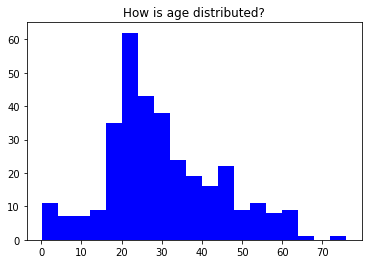

In [3]:
#make sure your packages have been imported

#subsetting the data we are interested in, dropping missing values
age = df['Age'].dropna()

plt.hist(age, bins= 'sqrt', color = 'Blue')  # bin choice via sqrt(n) provides something easy to understand visually
plt.title("How is age distributed?")
plt.show()

### Pie Charts

Pie charts are an interesting way of displaying proportions. If your data is categorical, pie charts provide us with a simple way of visualising the differences between the sizes of these categorical groups.


#### Indicator functions

Sometimes it is required that we define some sort of indicator. This is especially true when we talk about categorical. This is something that is important not only in the context of data visualisation, but more broadly these sorts of functions allow us to bridge the gap between categorical and numerical data types.

This particular indicator function iterates through elements within the column 'Sex' of our dataframe. It checks whether the element is the same as the string 'male', and if so will append a 1 to our indicator vector. If the element is 'female' (and in fact any other string), it will append a 0. From this we can calculate a proportion by summing up and dividing by length.

In [4]:
indi = []

for element in df['Sex']:
    if element == 'male':
        indi.append(1)
    else:
        indi.append(0)


#A quicker way
indi1 =  np.where(df['Sex'] == 'male',1 ,0)

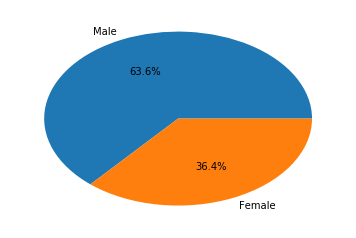

In [5]:
fracs = [sum(indi)/len(df),1-sum(indi)/len(df)]

labels = ['Male', 'Female']

plt.pie(fracs, labels=labels, autopct = '%1.1f%%', shadow=False)

plt.show()

### Combining Graphs

Sometimes it is useful to be able to combine different graphs and display them simultaneously. This could be because we want to compare groups, or emphasise a difference/similarity. This package allows us to do that.

Firstly, we will do an example of something similar to what we did earlier with the distribution of ages. For example, say now that we are interested not only in just the distribution of ages, but how similar the distribution of ages are across different values of a categorical variable (in our case sex, but this can be generalised).

In [6]:
male = df[df['Sex'] == 'male'] #subsets the dataframe into only those observations that are male
female = df[df['Sex'] == 'female']

It is important for us to keep the information that is not part of the 'Sex' category, and that is why we use the above method.

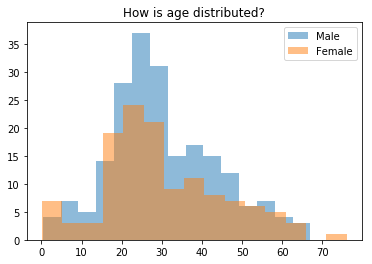

In [7]:
plt.hist(male['Age'].dropna(), bins= 15, alpha = 0.5, label = 'Male')
plt.hist(female['Age'].dropna(), bins = 15, alpha = 0.5, label = 'Female' )
plt.title("How is age distributed?")
plt.legend(loc='upper right')
plt.show()

In [8]:
a_cm = np.mean(male['Age'][male['Embarked'] == 'C'])
a_qm = np.mean(male['Age'][male['Embarked'] == 'Q'])
a_sm = np.mean(male['Age'][male['Embarked'] == 'S'])

a_cf = np.mean(female['Age'][female['Embarked'] == 'C'])
a_qf = np.mean(female['Age'][female['Embarked'] == 'Q'])
a_sf = np.mean(female['Age'][female['Embarked'] == 'S'])

age_male = [a_cm, a_qm, a_sm]
age_female = [a_cf, a_qf, a_sf]

Functions allow us to have much more 'elegant' solutions

In [9]:
def calc_mean_age(data,embarkment):      
    age_mean = np.mean(data['Age'][data['Embarked'] == embarkment])
    return age_mean

In [10]:
embarkment = ['C', 'Q', 'S']
age_male = []
age_female = []


for element in embarkment:
    mean = calc_mean_age(male,element)
    age_male.append(mean)
    
for element in embarkment:
    mean = calc_mean_age(female,element)
    age_female.append(mean)

We could of course iterate over the genders, this would be really useful if there were more than 2 categories, however considering we are only dealing with the case where there are 2, it isn't too hard to ommit that step.

In [11]:
age_m = {"Embarked": ['C' ,'Q','S'], "Means": age_male}
age_fm = {"Embarked": ['C' ,'Q','S'], "Means": age_female}

age_m = pd.DataFrame(age_m)
age_fm = pd.DataFrame(age_fm)

Here, we have created a dictionary so that the dataframes we are using to plot the charts are well formatted, dictionaries are useful tool when working with categorical variables, or when looking at cross sectional data in general.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


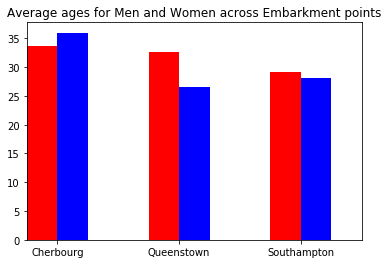

In [39]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = fig.add_subplot(111)

width = 0.25

age_m.Means.plot(kind='bar', color='red', ax=ax, width=width, position=1)
age_fm.Means.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

plt.title("Average ages for Men and Women across Embarkment points")
plt.xticks(np.arange(3), ('Cherbourg', 'Queenstown', 'Southampton'), rotation = 360)

plt.show()